In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
from scipy.stats import pearsonr

# Skylors Code
---

In [3]:
# Read in csv file
csv_file = pd.read_csv('../CSV_Files/spreadspoke_scores.csv')
nfl_df = pd.DataFrame(csv_file)
nfl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


## Data Cleaning
---

In [4]:
# Cut down DataFrame to see the last 5 years
five_year_df = nfl_df[nfl_df['schedule_season'] > 2018]
five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [5]:
# Clean data to make sure names and abbreviations are all the same.
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_favorite_id'] = five_year_df.loc[:,'team_favorite_id'].replace({'LV' : 'LVR'})

five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [6]:
# Remove unnecessary columns and add new columns to be used for analysis.
cleaned_df = five_year_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
cleaned_df['team_home_id'] = ''
cleaned_df['team_away_id'] = ''
cleaned_df['result'] = ''
cleaned_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,,,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,,,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,,,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,,,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,,


In [7]:
# Read in and display new DataFrame with adjusted abbreviations to use for analysis.
key_path = pd.read_csv('../CSV_Files/nfl_teams.csv')
team_key_df = pd.DataFrame(key_path)
team_key_df['Abbreviation'] = team_key_df['Abbreviation'].replace('LV', 'LVR')

team_key_df

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South
5,6,Chicago Bears,CHI,NFC,North
6,7,Cincinnati Bengals,CIN,AFC,North
7,8,Cleveland Browns,CLE,AFC,North
8,9,Dallas Cowboys,DAL,NFC,East
9,10,Denver Broncos,DEN,AFC,West


In [8]:
# Gather team names and abbreviations into lists in order to create a new dictionary.
names = []
abbreviation = []

for index, row in team_key_df.iterrows():
    names.append(row['Name'])
    abbreviation.append(row['Abbreviation'])

name_key = dict(zip(names, abbreviation))
name_key
    

{'Arizona Cardinals': 'ARI',
 'Atlanta Falcons': 'ATL',
 'Baltimore Ravens': 'BAL',
 'Buffalo Bills': 'BUF',
 'Carolina Panthers': 'CAR',
 'Chicago Bears': 'CHI',
 'Cincinnati Bengals': 'CIN',
 'Cleveland Browns': 'CLE',
 'Dallas Cowboys': 'DAL',
 'Denver Broncos': 'DEN',
 'Detroit Lions': 'DET',
 'Green Bay Packers': 'GB',
 'Houston Texans': 'HOU',
 'Indianapolis Colts': 'IND',
 'Jacksonville Jaguars': 'JAX',
 'Kansas City Chiefs': 'KC',
 'Miami Dolphins': 'MIA',
 'Minnesota Vikings': 'MIN',
 'New England Patriots': 'NE',
 'New Orleans Saints': 'NO',
 'New York Giants': 'NYG',
 'New York Jets': 'NYJ',
 'Las Vegas Raiders': 'LVR',
 'Philadelphia Eagles': 'PHI',
 'Pittsburgh Steelers': 'PIT',
 'Los Angeles Chargers': 'LAC',
 'San Francisco 49ers': 'SF',
 'Seattle Seahawks': 'SEA',
 'Los Angeles Rams': 'LAR',
 'Tampa Bay Buccaneers': 'TB',
 'Tennessee Titans': 'TEN',
 'Washington Commanders': 'WAS'}

In [9]:
# Use dictionary we created to fill in empty columns in cleaned DataFrame.
cleaned_df['team_home_id'] = cleaned_df['team_home'].map(name_key)
cleaned_df['team_away_id'] = cleaned_df['team_away'].map(name_key)
cleaned_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,


In [10]:
# Determine the resulting winner of each game and include the ID in the result column.
for index, row in cleaned_df.iterrows():
    if row['score_home'] > row['score_away']:
        cleaned_df.at[index, 'result'] = row['team_home_id']
    elif row['score_home'] < row['score_away']:
        cleaned_df.at[index, 'result'] = row['team_away_id']
    else:
        cleaned_df.at[index, 'result'] = 'Tie'

cleaned_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,SF


## Make Calculations for Team Favorite Win %

In [11]:
# Find total games played
total_games = cleaned_df['result'].count()
print(f'The total amount of games played in the last 5 year is: {total_games} games')

The total amount of games played in the last 5 year is: 1390 games


In [12]:
# Cut down data to where the favorite meets the result.
favorite_df = cleaned_df[cleaned_df['team_favorite_id'] == cleaned_df['result']]
favorite_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
12417,9/8/2019,2019,1,False,Los Angeles Chargers,30,24,Indianapolis Colts,LAC,LAC,IND,LAC
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,MIA,BAL,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13792,1/15/2024,2023,Wildcard,True,Buffalo Bills,31,17,Pittsburgh Steelers,BUF,BUF,PIT,BUF
13794,1/20/2024,2023,Division,True,Baltimore Ravens,34,10,Houston Texans,BAL,BAL,HOU,BAL
13795,1/20/2024,2023,Division,True,San Francisco 49ers,24,21,Green Bay Packers,SF,SF,GB,SF
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET


In [13]:
# Find the amount of games where the favorite team won.
fav_total = favorite_df['result'].count()
print(f'The amount of games the favorite team won in the last 5 years is: {fav_total} games')

The amount of games the favorite team won in the last 5 years is: 911 games


In [14]:
# Calculate the win percentage of favored teams.
fav_percentage = (fav_total / total_games) * 100
print(f'The success rate of favorited teams in the last 5 years is : {round(fav_percentage, 2)}%')

The success rate of favorited teams in the last 5 years is : 65.54%


In [15]:
# Edit original DataFrame to see which teams were weakest at home.
home_weak = cleaned_df[cleaned_df['team_home_id'] != cleaned_df['result']]
home_weak

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
...,...,...,...,...,...,...,...,...,...,...,...,...
13785,1/7/2024,2023,18,False,San Francisco 49ers,20,21,Los Angeles Rams,SF,SF,LAR,LAR
13787,1/7/2024,2023,18,False,Washington Commanders,10,38,Dallas Cowboys,DAL,WAS,DAL,DAL
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC


In [16]:
# Gather the count of home losses for each team.
home_weak = home_weak['team_home_id'].value_counts()
home_weak

team_home_id
WAS    30
ARI    29
CAR    28
HOU    27
JAX    26
NYJ    26
CHI    24
NYG    24
LAC    24
DET    24
ATL    23
NE     23
DEN    22
IND    21
LVR    20
TEN    20
CIN    20
TB     20
NO     19
PHI    19
SEA    18
MIN    18
SF     17
BAL    16
PIT    16
LAR    16
MIA    15
CLE    14
BUF    13
DAL    13
KC     13
GB     11
Name: count, dtype: int64

### Find The Top 10 Worst Home Teams.

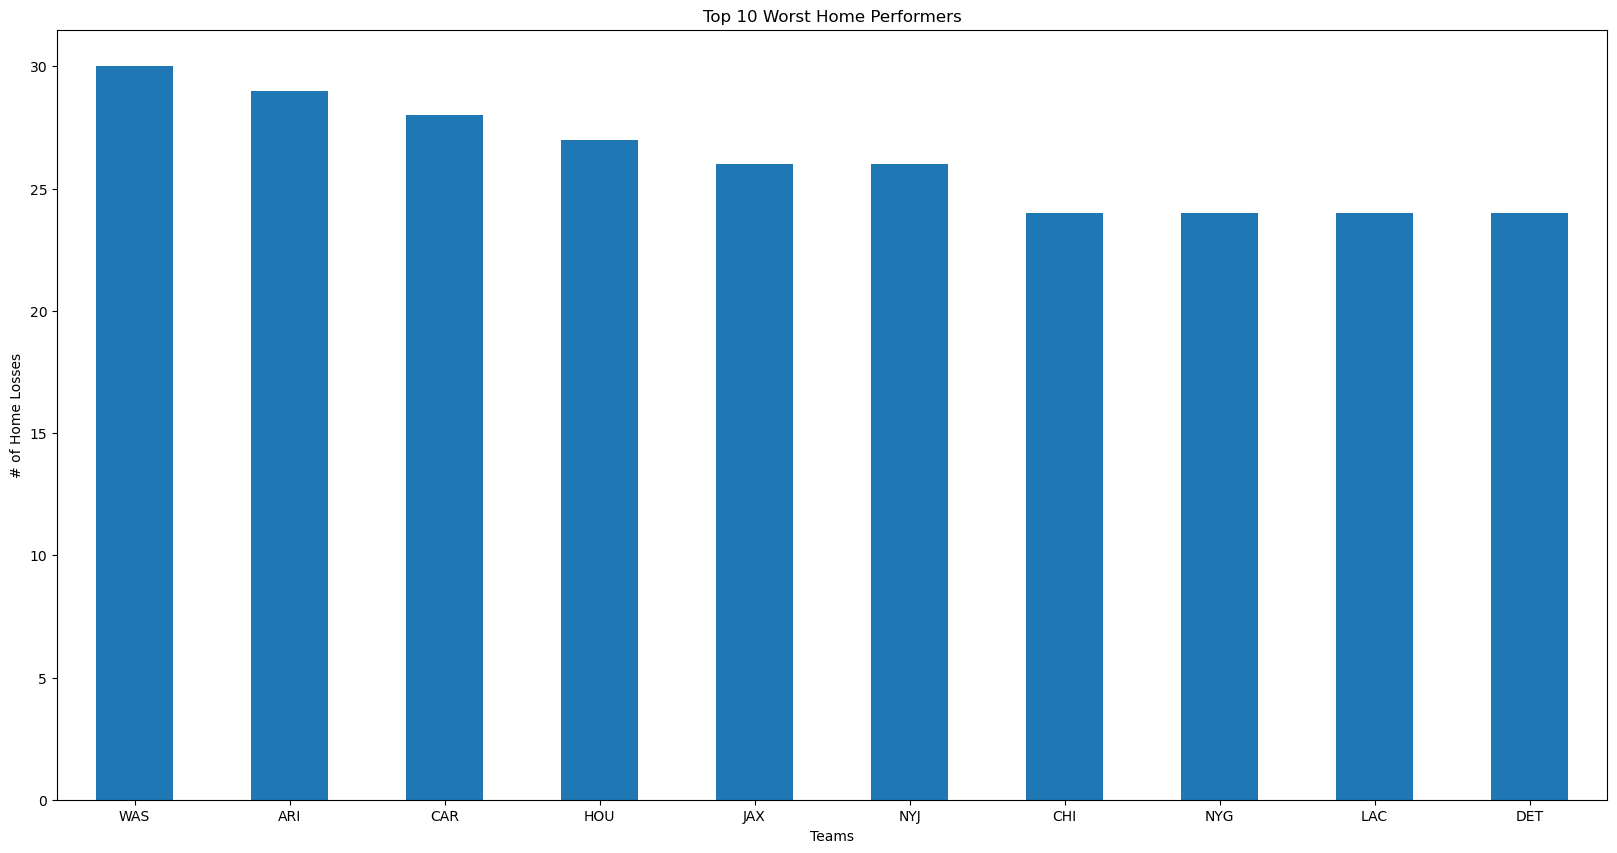

In [17]:
# Plot the 10 teams that performed worst with home advantage.
home_weak.head(10).plot(kind='bar', figsize=(20,10))
plt.title('Top 10 Worst Home Performers')
plt.xlabel('Teams')
plt.ylabel('# of Home Losses')
plt.xticks(rotation=0)
plt.show()

In [18]:
# Filter data to show only games where the away team won.
away_strong = cleaned_df[cleaned_df['team_away_id'] == cleaned_df['result']]
away_strong

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,MIA,BAL,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13785,1/7/2024,2023,18,False,San Francisco 49ers,20,21,Los Angeles Rams,SF,SF,LAR,LAR
13787,1/7/2024,2023,18,False,Washington Commanders,10,38,Dallas Cowboys,DAL,WAS,DAL,DAL
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC


In [19]:
# Get a count of games won as the away team by ID.
away_strong_count = away_strong['team_away_id'].value_counts()
away_strong_count

team_away_id
KC     36
SF     32
BAL    29
TB     28
BUF    27
NO     26
SEA    25
GB     25
LAR    24
PHI    23
TEN    23
MIN    22
PIT    21
DAL    21
NE     21
ARI    20
IND    19
LAC    18
CIN    18
LVR    17
WAS    17
MIA    17
HOU    16
CLE    16
CHI    15
DET    15
ATL    14
NYG    13
JAX    12
DEN    12
CAR    11
NYJ    11
Name: count, dtype: int64

### Find Top Ten Away Teams.

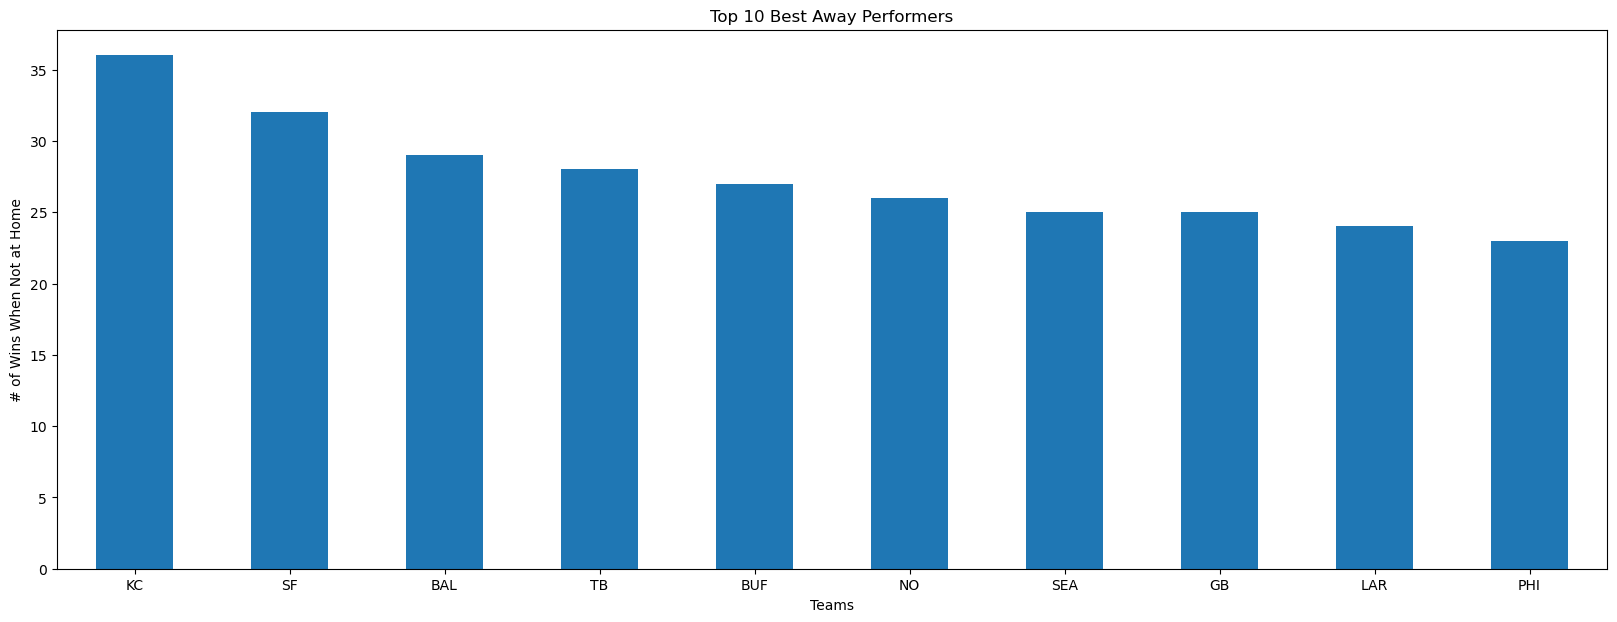

In [20]:
away_strong_count.head(10).plot(kind='bar', figsize=(20,7))
plt.xlabel('Teams')
plt.ylabel('# of Wins When Not at Home')
plt.title('Top 10 Best Away Performers')
plt.xticks(rotation=0)
plt.show()

### Make Scatter Plot to Compare Home Games to Home Wins.

In [21]:
# Get the count of favorite picks for each team
home_favorite = cleaned_df[cleaned_df['team_favorite_id'] == cleaned_df['team_home_id']]
home_favorite['team_favorite_id'].value_counts()

team_favorite_id
KC     49
BUF    43
SF     42
GB     39
BAL    38
DAL    36
TB     34
LAR    33
CLE    33
PHI    32
SEA    32
MIN    31
NO     31
LAC    30
PIT    29
IND    29
NE     29
TEN    27
CIN    24
DEN    24
ATL    23
LVR    21
MIA    21
DET    18
ARI    17
CHI    17
HOU    16
JAX    16
CAR    15
WAS    12
NYG    10
NYJ     8
Name: count, dtype: int64

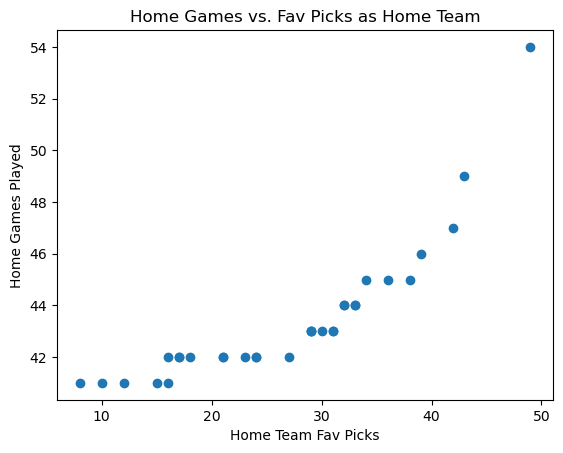

In [22]:
# Plot a scatter showing realionship between number of home games played and how often they were picked favorites.
plt.scatter(home_favorite['team_favorite_id'].value_counts(), cleaned_df['team_home_id'].value_counts())
plt.xlabel('Home Team Fav Picks')
plt.ylabel('Home Games Played')
plt.title('Home Games vs. Fav Picks as Home Team')
plt.show()

### Make Pie Chart Illustrating What Percent of Total Games Were Won by Favorites and Underdogs.

In [23]:
# Sample data
data = {'Categories': ['Total Favorite Wins', 'Total Underdog Wins'],
        'Values': [911, 474]}

df = pd.DataFrame(data)
df

,Categories,Values
0,Total Favorite Wins,911
1,Total Underdog Wins,474


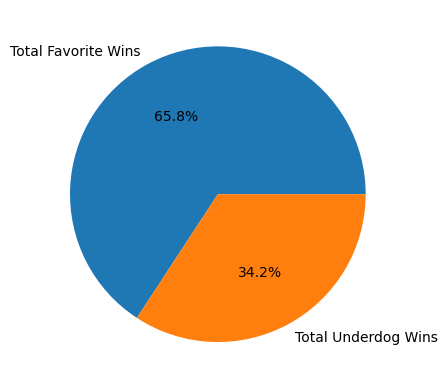

In [24]:
plt.pie(df['Values'], labels=df['Categories'], autopct='%1.1f%%')
plt.show()

# Kwangho's Code
---

### 1. Prepare & Data Cleaning & Filtering
 - Build Base Datas to Start the Code

In [25]:
# Path to CSV file
spreadspoke_scores_file = "../CSV_Files/spreadspoke_scores.csv"
nfl_teams_file = "../CSV_Files/nfl_teams.csv"
# Read CSV file into DataFrame
spreadspoke_scores_df = pd.read_csv(spreadspoke_scores_file)
nfl_teams_df = pd.read_csv(nfl_teams_file)

# Data inspection
# spreadspoke_scores_df
# nfl_teams_df

# Change Abbreviation with Old Abbreviation to Recent Abbreviation
nfl_teams_df['Abbreviation'] = nfl_teams_df['Abbreviation'].replace('LV', 'LVR')
spreadspoke_scores_df['team_favorite_id'] = spreadspoke_scores_df['team_favorite_id'].replace('LV', 'LVR')

# Data cleaning and filtering
# nfl_teams_clean_df = nfl_teams_df.drop(columns=['Conference', 'Division'])
last_5_years_df = spreadspoke_scores_df[spreadspoke_scores_df['schedule_season'] >= 2019]
clean_df = last_5_years_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
clean_df['Result'] = ''

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,Result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,
...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,


In [26]:
# Save Graph Images to Directed Folder
save_dir = "../Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [27]:
# Create a dictionary mapping team names to abbreviations
team_mapping = {
    'Kansas City Chiefs': 'KC',
    'Arizona Cardinals': 'ARI',
    'Atlanta Falcons': 'ATL',
    'Baltimore Ravens': 'BAL',
    'Buffalo Bills': 'BUF',
    'Carolina Panthers': 'CAR',
    'Chicago Bears': 'CHI',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE',
    'Dallas Cowboys': 'DAL',
    'Denver Broncos': 'DEN',
    'Detroit Lions': 'DET',
    'Green Bay Packers': 'GB',
    'Houston Texans': 'HOU',
    'Indianapolis Colts': 'IND',
    'Jacksonville Jaguars': 'JAX',
    'Las Vegas Raiders': 'LVR',
    'Los Angeles Chargers': 'LAC',
    'Los Angeles Rams': 'LAR',
    'Miami Dolphins': 'MIA',
    'Minnesota Vikings': 'MIN',
    'New England Patriots': 'NE',
    'New Orleans Saints': 'NO',
    'New York Giants': 'NYG',
    'New York Jets': 'NYJ',
    'Philadelphia Eagles': 'PHI',
    'Pittsburgh Steelers': 'PIT',
    'San Francisco 49ers': 'SF',
    'Seattle Seahawks': 'SEA',
    'Tampa Bay Buccaneers': 'TB',
    'Tennessee Titans': 'TEN',
    'Washington Commanders': 'WAS'
}

# Apply the mapping to team_home and team_away columns
last_5_years_df['team_home_abbr'] = last_5_years_df['team_home'].map(team_mapping)
last_5_years_df['team_away_abbr'] = last_5_years_df['team_away'].map(team_mapping)

C:\Users\jacob\AppData\Local\Temp\ipykernel_25628\2534720253.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years_df['team_home_abbr'] = last_5_years_df['team_home'].map(team_mapping)
C:\Users\jacob\AppData\Local\Temp\ipykernel_25628\2534720253.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years_df['team_away_abbr'] = last_5_years_df['team_away'].map(team_mapping)


In [28]:
# Determine the resulting winner of each game and include the ID in the result column.
for index, row in clean_df.iterrows():
    if row['score_home'] > row['score_away']:
        clean_df.at[index, 'result'] = row['team_home']
    elif row['score_home'] < row['score_away']:
        clean_df.at[index, 'result'] = row['team_away']
    else:
        clean_df.at[index, 'result'] = 'Tie'

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,Result,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,,Green Bay Packers
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,,Los Angeles Rams
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,,Tennessee Titans
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,,Dallas Cowboys
...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,Kansas City Chiefs
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,Detroit Lions
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,Kansas City Chiefs
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,San Francisco 49ers


### 2. Calculation & Visual Datas

In [29]:
# Each team played count
games_played_by_team = clean_df['team_home'].value_counts() + clean_df['team_away'].value_counts()
games_played_by_team_df = games_played_by_team.reset_index()
games_played_by_team_df.columns = ['Name', 'Total played Game']
games_played_by_team

Arizona Cardinals           84
Atlanta Falcons             83
Baltimore Ravens            89
Buffalo Bills               92
Carolina Panthers           83
Chicago Bears               84
Cincinnati Bengals          89
Cleveland Browns            86
Dallas Cowboys              87
Denver Broncos              83
Detroit Lions               86
Green Bay Packers           90
Houston Texans              87
Indianapolis Colts          84
Jacksonville Jaguars        85
Kansas City Chiefs          99
Las Vegas Raiders           68
Los Angeles Chargers        84
Los Angeles Rams            90
Miami Dolphins              85
Minnesota Vikings           86
New England Patriots        85
New Orleans Saints          86
New York Giants             85
New York Jets               83
Oakland Raiders             16
Philadelphia Eagles         89
Pittsburgh Steelers         86
San Francisco 49ers         95
Seattle Seahawks            87
Tampa Bay Buccaneers        92
Tennessee Titans            88
Washingt

In [30]:
# Count of favorite team appearances
team_favorite_count = clean_df["team_favorite_id"].value_counts()
team_favorite_count_df = team_favorite_count.reset_index()
team_favorite_count_df.columns = ['Abbreviation', 'Favorite Pick Count']
team_favorite_count_df

,Abbreviation,Favorite Pick Count
0,KC,87
1,SF,73
2,BUF,69
3,BAL,66
4,DAL,62
5,TB,60
6,GB,59
7,PHI,58
8,LAR,55
9,NO,54


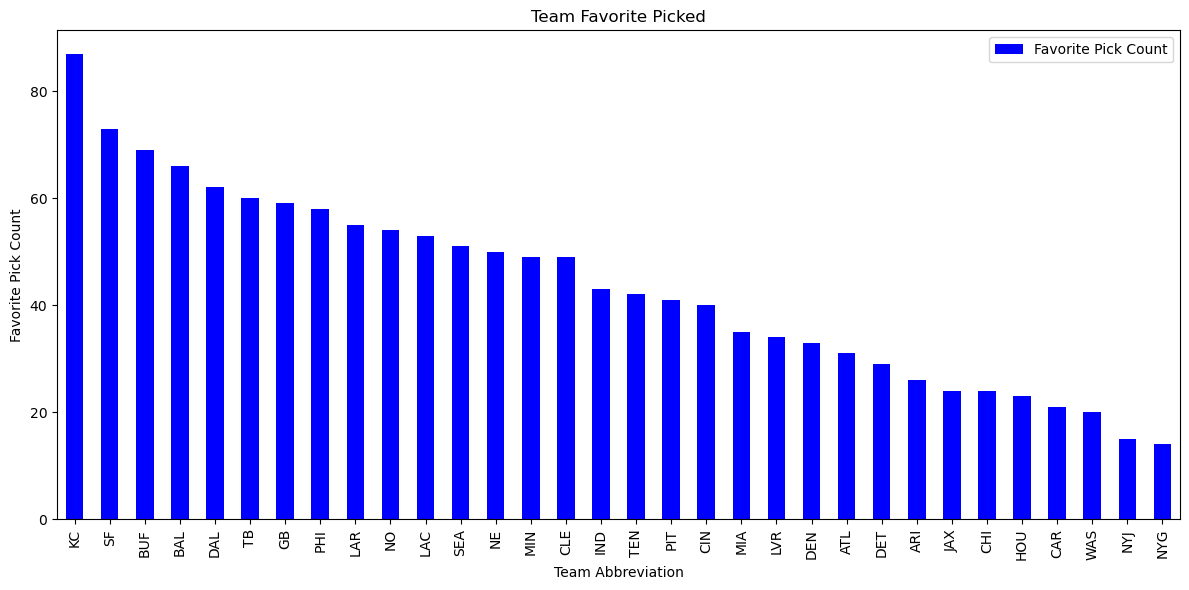

In [31]:
# Generate Bar Graph
team_favorite_count_df.plot(kind='bar', x='Abbreviation', y='Favorite Pick Count', color='blue', figsize=(12, 6))

# Labeling x-axis and y-axis
plt.title("Team Favorite Picked")
plt.xlabel('Team Abbreviation')
plt.ylabel('Favorite Pick Count')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Team Favorite Picked.png'))
plt.show()

In [32]:
# Count of favorite team appearances
favorite_wins_home = clean_df[clean_df["score_home"] > clean_df["score_away"]]["result"].value_counts()
favorite_wins_away = clean_df[clean_df["score_away"] > clean_df["score_home"]]["result"].value_counts()
favorite_wins = favorite_wins_home + favorite_wins_away
favorite_wins_df = favorite_wins.reset_index()
favorite_wins_df.columns = ['Name', 'Win Count']
favorite_wins_df

,Name,Win Count
0,Arizona Cardinals,32
1,Atlanta Falcons,32
2,Baltimore Ravens,58
3,Buffalo Bills,63
4,Carolina Panthers,24
5,Chicago Bears,32
6,Cincinnati Bengals,42
7,Cleveland Browns,44
8,Dallas Cowboys,51
9,Denver Broncos,32


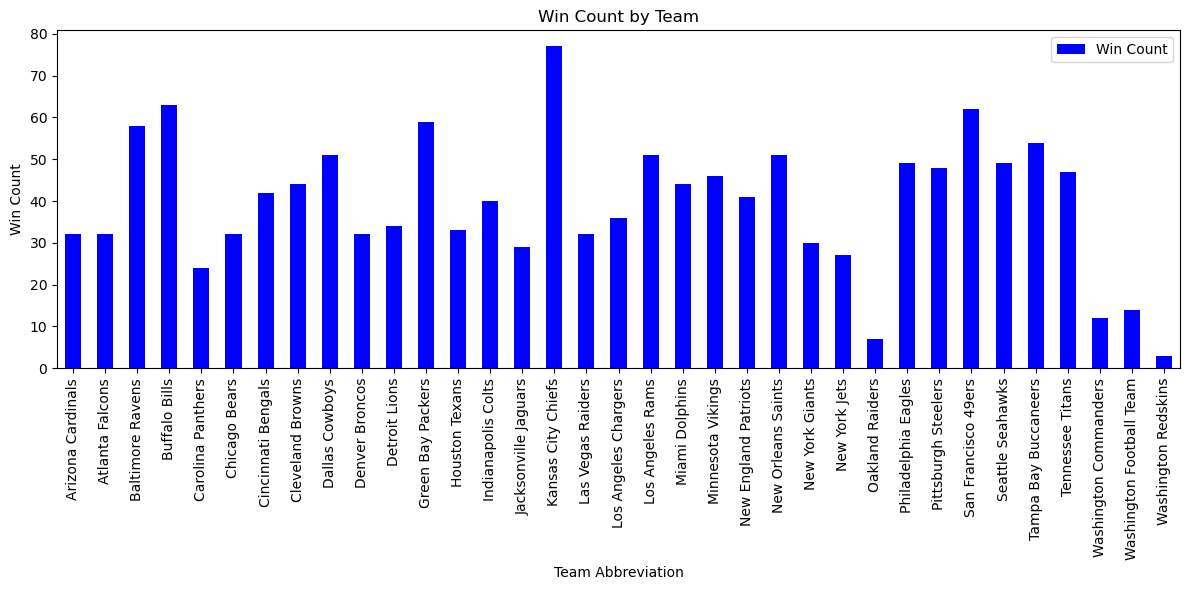

In [33]:
# Create Graph
favorite_wins_df.plot(kind='bar', x='Name', y='Win Count', color='blue', figsize=(12, 6))

# Labeling Title and labels
plt.title('Win Count by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Win Count')

# Save plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'win_count_by_team.png'))
plt.show()

### 3. Merging Datas

In [34]:
# Merge Dateframes
merged_f_t = pd.merge(favorite_wins_df, nfl_teams_df, on='Name')
merged_df = pd.merge(merged_f_t, team_favorite_count_df, on='Abbreviation')
merged_Data = pd.merge(merged_df, games_played_by_team_df, on='Name')

# Create List for Value of 'Favorite Pick' and 'Win Count'
favorite_picks = []
Total_played_Game = []
win_rates = []

# Each Team Favorite Pick Calculation and add to merged_df
for index, row in merged_Data.iterrows():
    favorite_pick = row['Win Count'] + (row['Favorite Pick Count'] - row['Win Count'])
    favorite_picks.append(favorite_pick)
merged_Data['Favorite Pick Count'] = favorite_picks

# Each Team 'Win Count' Calculation and add to merged_df
for index, row in merged_Data.iterrows():
    win_rate = row['Win Count'] / row['Total played Game'] * 100
    win_rates.append(round(win_rate, 2))
merged_Data['Win Rate'] = win_rates

In [35]:
# Reindex column
new_column_order = ['ID', 'Name', 'Abbreviation', 'Total played Game', 'Win Count', 'Favorite Pick Count', 'Win Rate']
clear_merge = merged_Data.reindex(columns=new_column_order)
clear_merge

,ID,Name,Abbreviation,Total played Game,Win Count,Favorite Pick Count,Win Rate
0,1,Arizona Cardinals,ARI,84,32,26,38.10
1,2,Atlanta Falcons,ATL,83,32,31,38.55
2,3,Baltimore Ravens,BAL,89,58,66,65.17
3,4,Buffalo Bills,BUF,92,63,69,68.48
4,5,Carolina Panthers,CAR,83,24,21,28.92
5,6,Chicago Bears,CHI,84,32,24,38.10
6,7,Cincinnati Bengals,CIN,89,42,40,47.19
7,8,Cleveland Browns,CLE,86,44,49,51.16
8,9,Dallas Cowboys,DAL,87,51,62,58.62
9,10,Denver Broncos,DEN,83,32,33,38.55


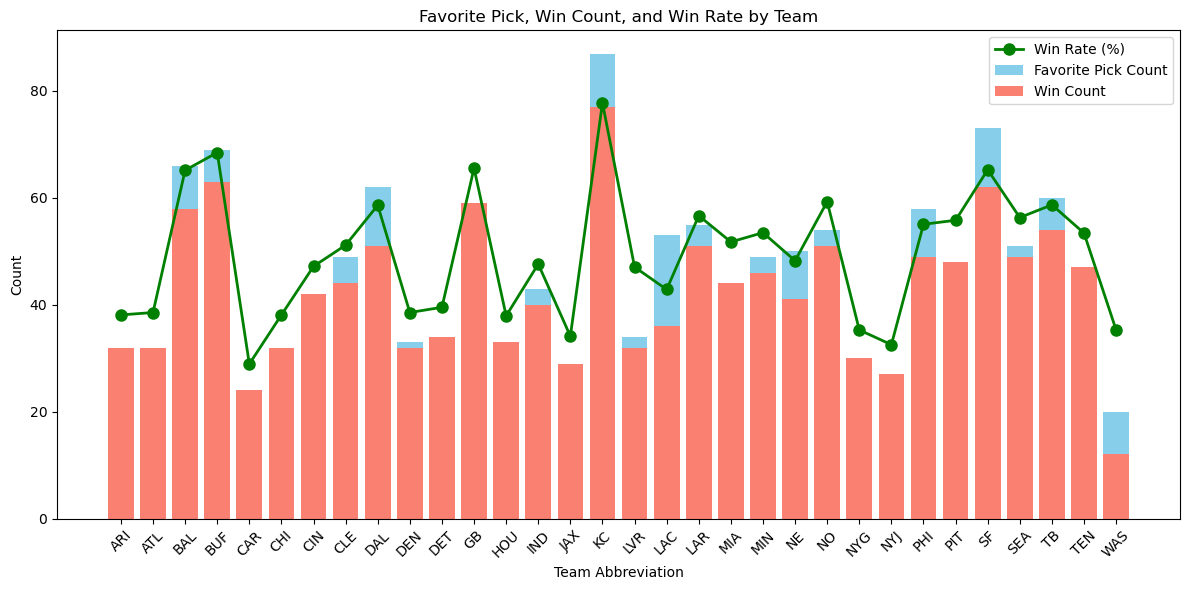

In [36]:
# Graph preparation
plt.figure(figsize=(12, 6))

# Assign data to x and y axes
x = merged_Data['Abbreviation']
y1 = merged_Data['Favorite Pick Count']
y2 = merged_Data['Win Count']
y3 = merged_Data['Win Rate']

# Draw bar plot
plt.bar(x, y1, color='skyblue', label='Favorite Pick Count')
plt.bar(x, y2, color='salmon', label='Win Count')
plt.plot(x, y3, color='green', marker='o', linestyle='-', linewidth=2, markersize=8, label='Win Rate (%)')

# Add title and axis labels
plt.title('Favorite Pick, Win Count, and Win Rate by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'bar_plot_team_stats.png'))
plt.show()

### 4. Calculation for Questions

In [37]:
# Calculate Moneyline
def calculate_moneyline(clear_merge):
    return 100 / clear_merge
Moneyline_df = clear_merge
# Add Moneyline to Dataframe
Moneyline_df['Moneyline'] = Moneyline_df['Win Rate'].apply(calculate_moneyline)

# Result
Moneyline_df

,ID,Name,Abbreviation,Total played Game,Win Count,Favorite Pick Count,Win Rate,Moneyline
0,1,Arizona Cardinals,ARI,84,32,26,38.10,2.624672
1,2,Atlanta Falcons,ATL,83,32,31,38.55,2.594034
2,3,Baltimore Ravens,BAL,89,58,66,65.17,1.534448
3,4,Buffalo Bills,BUF,92,63,69,68.48,1.460280
4,5,Carolina Panthers,CAR,83,24,21,28.92,3.457815
5,6,Chicago Bears,CHI,84,32,24,38.10,2.624672
6,7,Cincinnati Bengals,CIN,89,42,40,47.19,2.119093
7,8,Cleveland Browns,CLE,86,44,49,51.16,1.954652
8,9,Dallas Cowboys,DAL,87,51,62,58.62,1.705902
9,10,Denver Broncos,DEN,83,32,33,38.55,2.594034


In [38]:
# CSV 파일 경로 설정
csv_file_path = "../CSV_Files/Moneyline_df.csv"

# DataFrame을 CSV 파일로 저장
Moneyline_df.to_csv(csv_file_path, index=False)

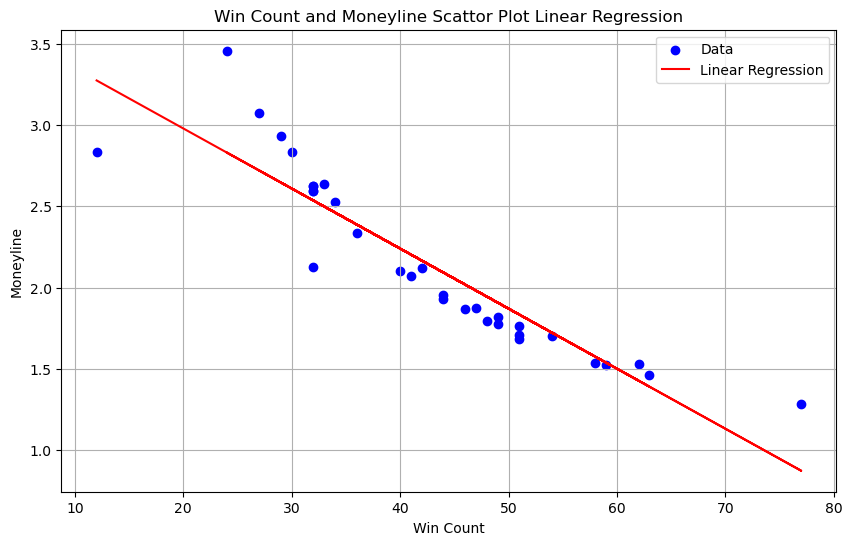

Win Count and Moneyline Correlation: -0.91665315831753


In [39]:
# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(Moneyline_df['Win Count'], Moneyline_df['Moneyline'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Count'], Moneyline_df['Moneyline'], color='blue', label='Data')

# Plot linear regression line
plt.plot(Moneyline_df['Win Count'], intercept + slope * Moneyline_df['Win Count'], color='red', label='Linear Regression')

# Labeling the plot
plt.xlabel('Win Count')
plt.ylabel('Moneyline')
plt.title('Win Count and Moneyline Scattor Plot Linear Regression')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# correlation between Moneyline and Win Count
correlation = Moneyline_df['Win Count'].corr(Moneyline_df['Moneyline'])
print("Win Count and Moneyline Correlation:", correlation)

 - Negative correlation between Win Count and Moneyline with a correlation coefficient of '-0.91665315831753' on Win Count and Moneyline Scattor Plot Linear Regression.

In [40]:
# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'], color='blue', label='Data')
plt.plot(Moneyline_df['Win Rate'], intercept + slope * Moneyline_df['Win Rate'], color='red', label='Linear Regression')
plt.xlabel('Win Rate')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'scatter_plot_with_linear_regression.png'))
plt.close()

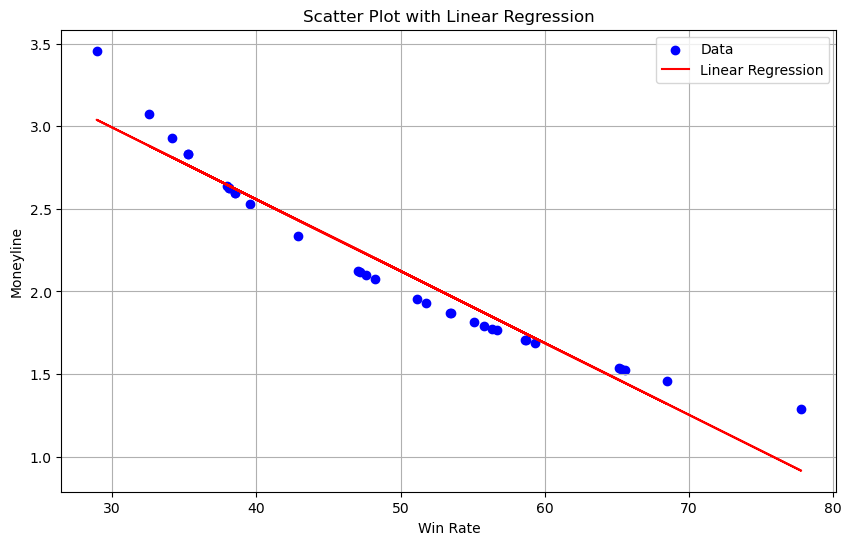

Correlation between Win Rate and Moneyline: -0.9686600108909719


In [41]:
# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'], color='blue', label='Data')

# Plot linear regression line
plt.plot(Moneyline_df['Win Rate'], intercept + slope * Moneyline_df['Win Rate'], color='red', label='Linear Regression')

# Labeling the plot
plt.xlabel('Win Rate')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
# Save Image
save_dir = "../Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'scatter_plot_with_linear_regression.png'))
plt.close()


# Calculate correlation
correlation = Moneyline_df['Win Rate'].corr(Moneyline_df['Moneyline'])
print("Correlation between Win Rate and Moneyline:", correlation)

 - Negative correlation between Win Rate and Moneyline with a correlation coefficient of '-0.9686600108909719' on Win Rate and Moneyline Scattor Plot Linear Regression.

In [42]:
# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Win Rate'], Moneyline_df['Moneyline'], color='blue', label='Data')
plt.plot(Moneyline_df['Win Rate'], intercept + slope * Moneyline_df['Win Rate'], color='red', label='Linear Regression')
plt.xlabel('Win Rate')
plt.ylabel('Moneyline')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'scatter_plot_with_linear_regression.png'))
plt.close()

In [43]:
# Calculate win count for each team
win_count_home = clean_df[clean_df['score_home'] > clean_df['score_away']]['team_home'].value_counts().reset_index()
win_count_home.columns = ['Team', 'Win at Home']
win_count_away = clean_df[clean_df['score_away'] > clean_df['score_home']]['team_away'].value_counts().reset_index()
win_count_away.columns = ['Team', 'Win at Away']
win_count = pd.concat([win_count_home, win_count_away]).groupby('Team').sum().reset_index()

# Merge win counts for home and away games for each team
win_total = win_count_home.merge(win_count_away, on='Team', how='outer').fillna(0)
win_total['Win Total'] = win_total['Win at Home'] + win_total['Win at Away']

# Calculate losses at home for each team
losses_at_home = clean_df[clean_df['score_home'] < clean_df['score_away']]['team_home'].value_counts().reset_index()
losses_at_home.columns = ['Team', 'Losses at Home']

# Calculate losses away for each team
losses_away = clean_df[clean_df['score_away'] < clean_df['score_home']]['team_away'].value_counts().reset_index()
losses_away.columns = ['Team', 'Losses away']

# Combine losses at home and away for each team
losses_total = losses_at_home.merge(losses_away, on='Team', how='outer').fillna(0)
losses_total['Total Losses'] = losses_total['Losses at Home'] + losses_total['Losses away']

In [44]:
# Calculate total games played for each team
total_games_home = clean_df['team_home'].value_counts().reset_index()
total_games_home.columns = ['Team', 'Total Games']
total_games_away = clean_df['team_away'].value_counts().reset_index()
total_games_away.columns = ['Team', 'Total Games']
total_games = pd.concat([total_games_home, total_games_away]).groupby('Team').sum().reset_index()

# Calculate draw (tie) for each team
draw_home = clean_df[clean_df['score_home'] == clean_df['score_away']]['team_home'].value_counts().reset_index()
draw_home.columns = ['Team', 'Draw(Tie)']
draw_away = clean_df[clean_df['score_away'] == clean_df['score_home']]['team_away'].value_counts().reset_index()
draw_away.columns = ['Team', 'Draw(Tie)']
draw_total = pd.concat([draw_home, draw_away]).groupby('Team').sum().reset_index()

# Merge total games and draw counts
draw_ratio = pd.merge(total_games, draw_total, on='Team', how='left').fillna(0)

# Calculate draw ratio
draw_ratio['Draw Ratio'] = draw_ratio['Draw(Tie)'] / draw_ratio['Total Games']

# Find team with most draws
most_draws = draw_ratio[draw_ratio['Draw Ratio'] == draw_ratio['Draw Ratio'].max()]

In [45]:
# Merge win count, losses total, draw total, and total games dataframes
team_stats = pd.merge(win_total, losses_total, on='Team', how='outer')
team_stats = pd.merge(team_stats, draw_total, on='Team', how='outer')
team_stats = pd.merge(team_stats, total_games, on='Team', how='outer')

team_stats

,Team,Win at Home,Win at Away,Win Total,Losses at Home,Losses away,Total Losses,Draw(Tie),Total Games
0,Kansas City Chiefs,41,36,77,13,9,22,NaN,99
1,Buffalo Bills,36,27,63,13,16,29,NaN,92
2,Green Bay Packers,34,25,59,11,20,31,NaN,90
3,San Francisco 49ers,30,32,62,17,16,33,NaN,95
4,Dallas Cowboys,30,21,51,13,23,36,NaN,87
5,Baltimore Ravens,29,29,58,16,15,31,NaN,89
6,Cleveland Browns,28,16,44,14,28,42,NaN,86
7,Miami Dolphins,27,17,44,15,26,41,NaN,85
8,Pittsburgh Steelers,27,21,48,15,22,37,1.0,86
9,Los Angeles Rams,27,24,51,16,23,39,NaN,90


In [46]:
# Save as CSV file to located Direction
csv_file_path = "../CSV_Files/team_stats.csv"
team_stats.to_csv(csv_file_path, index=False)

### Answer For the Questions 1 & 2

In [47]:
# Favorite Team Picked and game information
F_Team_rate = Moneyline_df.loc[Moneyline_df['Favorite Pick Count'].idxmax()]
print('---------------------------------------------------')
print(F_Team_rate)
print('---------------------------------------------------')

---------------------------------------------------
ID                                     16
Name                   Kansas City Chiefs
Abbreviation                           KC
Total played Game                      99
Win Count                              77
Favorite Pick Count                    87
Win Rate                            77.78
Moneyline                        1.285678
Name: 15, dtype: object
---------------------------------------------------


In [48]:
# Find team with most total win and losses
most_wins_total = win_total.loc[win_total['Win Total'].idxmax()]
most_losses_total = losses_total.loc[losses_total['Total Losses'].idxmax()]
print('---------------------------------------------------')
print("Team with most total wins:")
print(most_wins_total)
print('---------------------------------------------------')
print("Team with most total losses:")
print(most_losses_total)
print('---------------------------------------------------')

---------------------------------------------------
Team with most total wins:
Team           Kansas City Chiefs
Win at Home                    41
Win at Away                    36
Win Total                      77
Name: 0, dtype: object
---------------------------------------------------
Team with most total losses:
Team              Carolina Panthers
Losses at Home                   28
Losses away                      31
Total Losses                     59
Name: 0, dtype: object
---------------------------------------------------


Favorite Pick Count and Win Rate Correlation: 0.9377450434698935


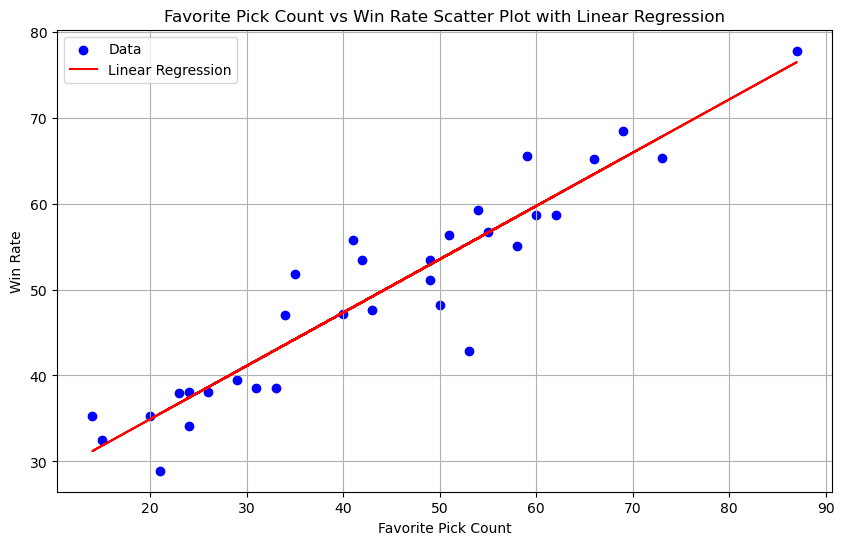

In [49]:
# Calculate correlation
correlation = Moneyline_df['Favorite Pick Count'].corr(Moneyline_df['Win Rate'])
print("Favorite Pick Count and Win Rate Correlation:", correlation)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(Moneyline_df['Favorite Pick Count'], Moneyline_df['Win Rate'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Moneyline_df['Favorite Pick Count'], Moneyline_df['Win Rate'], color='blue', label='Data')

# Plot linear regression line
plt.plot(Moneyline_df['Favorite Pick Count'], intercept + slope * Moneyline_df['Favorite Pick Count'], color='red', label='Linear Regression')

# Labeling the plot
plt.xlabel('Favorite Pick Count')
plt.ylabel('Win Rate')
plt.title('Favorite Pick Count vs Win Rate Scatter Plot with Linear Regression')
plt.legend()

# Display the plot
plt.grid(True)

# Define the file path
file_path = "../Images/scatter_plot_with_linear_regression.png"

# Save the plot as an image
plt.savefig(file_path)

## Peters Code
---

In [50]:
# Load NFL data from CSV file
df = pd.read_csv("../CSV_files/spreadspoke_scores.csv")

In [51]:
#Filter out last 5 years (seasons) of data (2019-2020 season thru 2023-2024 season)
five_year_df = df[df['schedule_season'] > 2018]
#Change former "Raiders" team ID to its current ID LVR across all seasons.(2019-2020 Season lists Raiders as LV, not LVR)
five_year_df.loc[five_year_df['schedule_season'] > 2018, 'team_favorite_id'] = five_year_df['team_favorite_id'].replace('LV', 'LVR')
#Show first 10 rows of filtered results
five_year_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,-3.5,49,TIAA Bank Field,False,NaN,NaN,NaN,NaN
12417,9/8/2019,2019,1,False,Los Angeles Chargers,30,24,Indianapolis Colts,LAC,-6.0,44.5,Dignity Health Sports Park,False,NaN,NaN,NaN,NaN
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,-7.0,40.5,Hard Rock Stadium,False,NaN,NaN,NaN,NaN
12419,9/8/2019,2019,1,False,Minnesota Vikings,28,12,Atlanta Falcons,MIN,-3.5,47,U.S. Bank Stadium,False,72.0,0.0,NaN,indoor
12420,9/8/2019,2019,1,False,New England Patriots,33,3,Pittsburgh Steelers,NE,-5.5,49,Gillette Stadium,False,NaN,NaN,NaN,NaN


In [52]:
#Count the number of times each team was picked as a favorite in its game
favorite_counts = five_year_df["team_favorite_id"].value_counts()
favorite_counts

team_favorite_id
KC     87
SF     73
BUF    69
BAL    66
DAL    62
TB     60
GB     59
PHI    58
LAR    55
NO     54
LAC    53
SEA    51
NE     50
MIN    49
CLE    49
IND    43
TEN    42
PIT    41
CIN    40
MIA    35
LVR    34
DEN    33
ATL    31
DET    29
ARI    26
JAX    24
CHI    24
HOU    23
CAR    21
WAS    20
NYJ    15
NYG    14
Name: count, dtype: int64

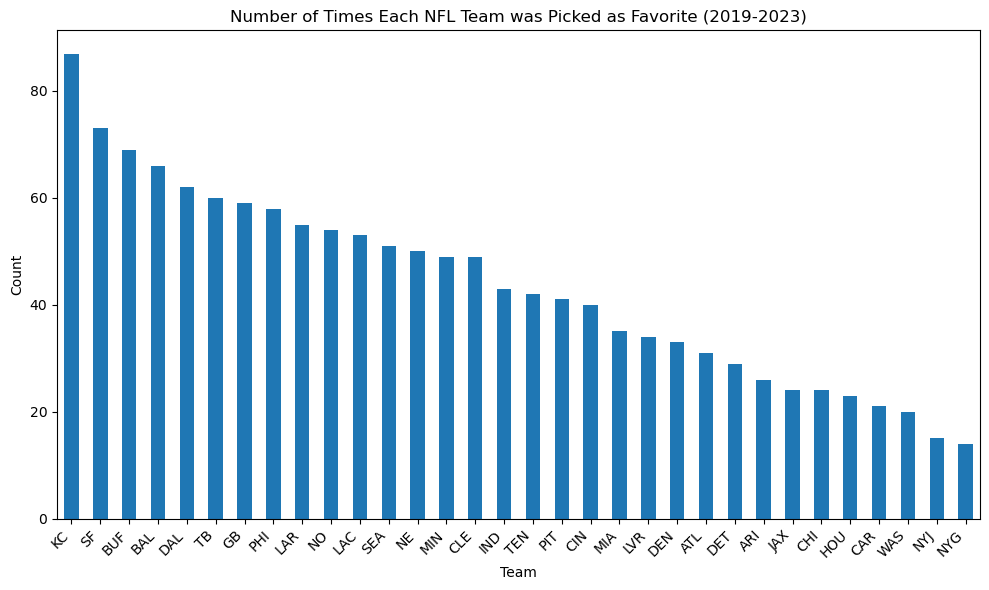

In [53]:
#Plot the number of times was picked as a favorite using a barchart
plt.figure(figsize=(10, 6))
favorite_counts.plot(kind='bar')
plt.title('Number of Times Each NFL Team was Picked as Favorite (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [54]:
#get a count of wins for chosen team favorites 
favorite_wins = five_year_df[five_year_df["score_home"] > five_year_df["score_away"]]["team_favorite_id"].value_counts()
favorite_wins

team_favorite_id
KC     48
BUF    41
GB     38
SF     37
DAL    36
PHI    34
BAL    33
CLE    32
TB     29
LAR    29
NO     28
LAC    26
CIN    24
IND    24
MIA    23
SEA    23
MIN    23
NE     23
PIT    22
LVR    22
DEN    19
TEN    18
ATL    18
DET    18
HOU    13
CHI    12
ARI    11
JAX     9
NYJ     8
NYG     7
WAS     7
CAR     6
Name: count, dtype: int64

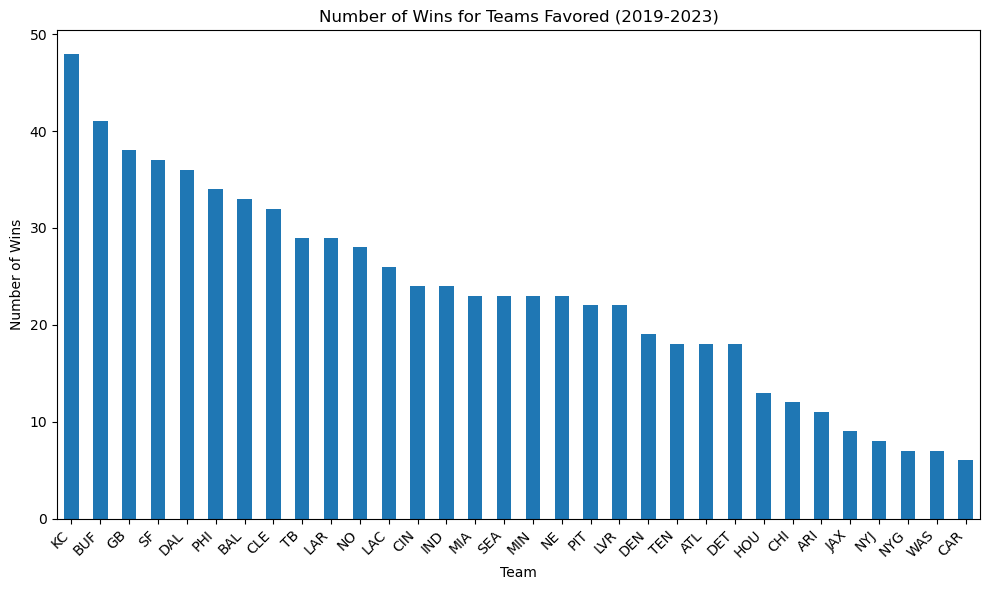

In [55]:
#Plot the number of wins for each team favored
plt.figure(figsize=(10, 6))
favorite_wins.plot(kind='bar')
plt.title('Number of Wins for Teams Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [56]:
#find out what percentage of time the favorite actually wins
win_percentage = (favorite_wins / favorite_counts) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)
win_percentage_sorted

team_favorite_id
MIA    65.714286
CLE    65.306122
LVR    64.705882
GB     64.406780
DET    62.068966
CIN    60.000000
BUF    59.420290
PHI    58.620690
DAL    58.064516
ATL    58.064516
DEN    57.575758
HOU    56.521739
IND    55.813953
KC     55.172414
PIT    53.658537
NYJ    53.333333
LAR    52.727273
NO     51.851852
SF     50.684932
NYG    50.000000
CHI    50.000000
BAL    50.000000
LAC    49.056604
TB     48.333333
MIN    46.938776
NE     46.000000
SEA    45.098039
TEN    42.857143
ARI    42.307692
JAX    37.500000
WAS    35.000000
CAR    28.571429
Name: count, dtype: float64

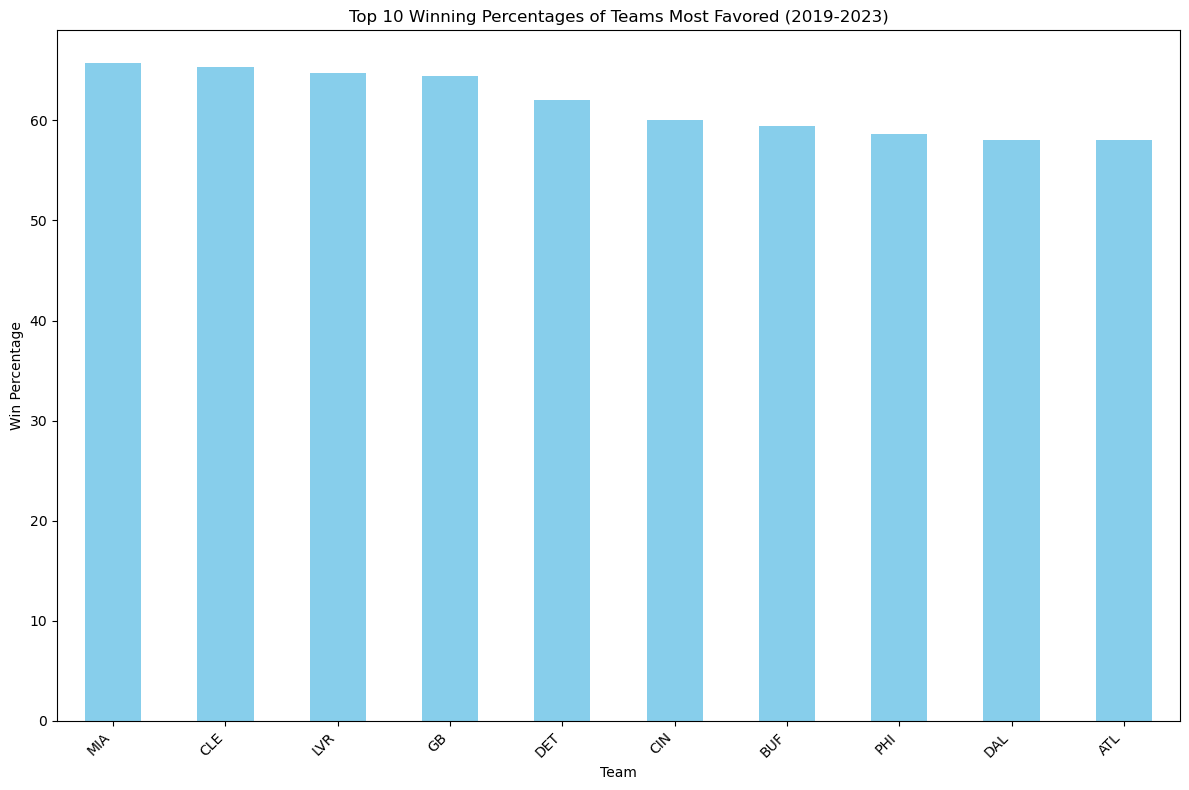

In [57]:
#plot the top 10 winning percentages of teams most favored
plt.figure(figsize=(12, 8))
win_percentage_sorted.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Winning Percentages of Teams Most Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [58]:
#Create a DataFrame for the top 10 most picked favorites
favorite_counts_df = pd.DataFrame({'Team': favorite_counts.index, 'Count': favorite_counts.values})
favorite_counts_df.columns = ['Team', 'Count']
print(f"The top 10 most picked favorites are: {favorite_counts_df.head(10)}")

The top 10 most picked favorites are:   Team  Count
0   KC     87
1   SF     73
2  BUF     69
3  BAL     66
4  DAL     62
5   TB     60
6   GB     59
7  PHI     58
8  LAR     55
9   NO     54


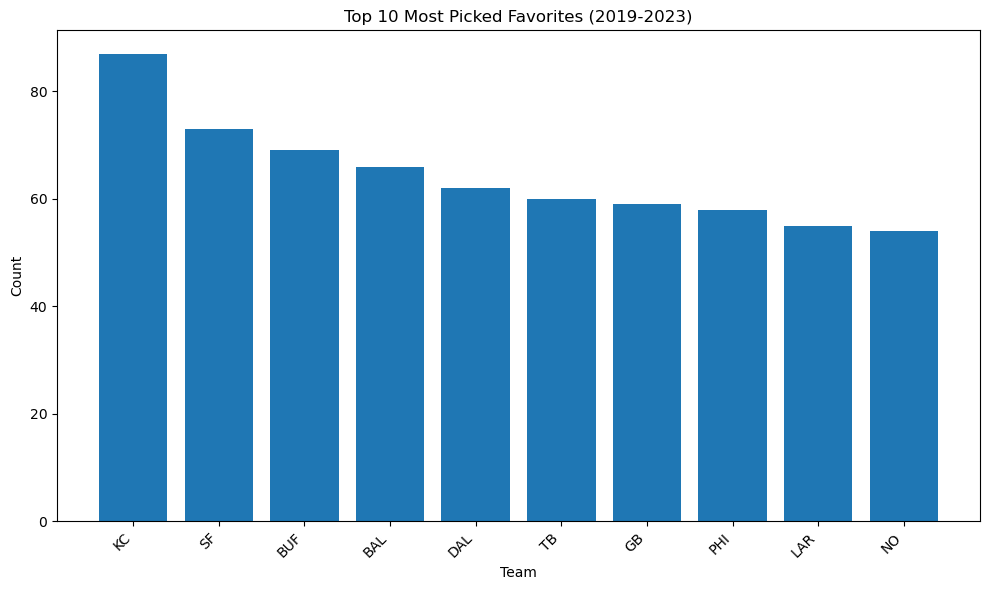

In [59]:
# Plotting the top 10 most picked favorites sorted from highest to lowest
plt.figure(figsize=(10, 6))
plt.bar(favorite_counts_df['Team'].head(10), favorite_counts_df['Count'].head(10))
plt.title('Top 10 Most Picked Favorites (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [60]:
#creating a data frame for winning percentages, as index and winning percentages
win_percentage_df = pd.DataFrame({"Team" : win_percentage.index, "Win Percentage" : win_percentage.values})
#renaming columns to Team and Win Percentage
win_percentage_df.columns = ['Team', 'Win Percentage']

win_percentage_df_sorted = win_percentage_df.sort_values(by='Win Percentage', ascending=False)
print(f"The top 10 winning percentages of teams most favorited are:\n{win_percentage_df_sorted.head(10)}")

The top 10 winning percentages of teams most favorited are:
   Team  Win Percentage
19  MIA       65.714286
7   CLE       65.306122
18  LVR       64.705882
11   GB       64.406780
10  DET       62.068966
6   CIN       60.000000
3   BUF       59.420290
25  PHI       58.620690
8   DAL       58.064516
1   ATL       58.064516


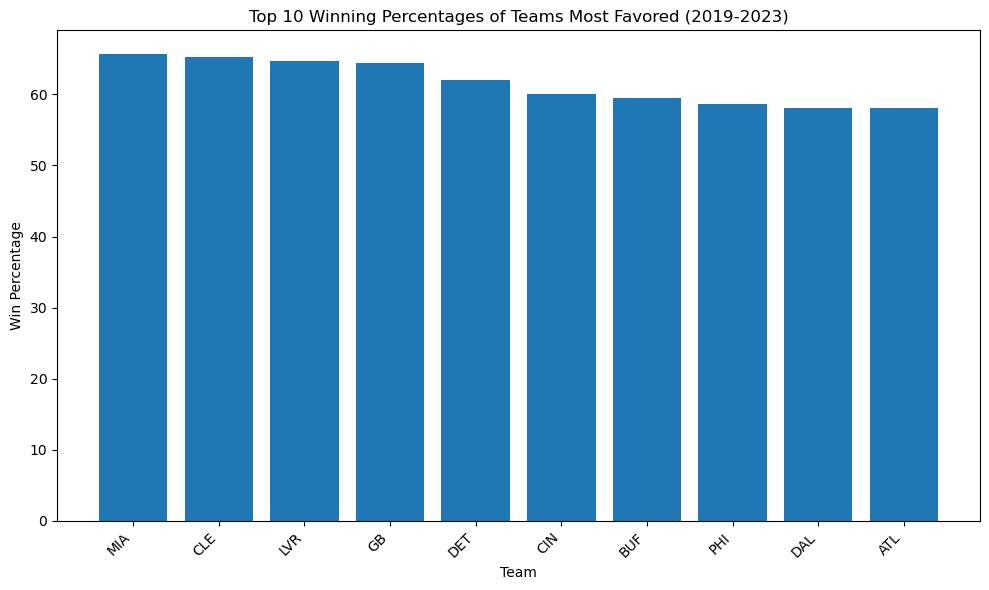

In [61]:
#Plotting the top 10 winning percentages of teams most favored
plt.figure(figsize=(10, 6))
plt.bar(win_percentage_df_sorted['Team'].head(10), win_percentage_df_sorted['Win Percentage'].head(10))
plt.title('Top 10 Winning Percentages of Teams Most Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [62]:
#creating DataFrame which calculates correlation between favorites picked and favorite wins for top 10
correlation_df = pd.merge(favorite_counts_df, favorite_wins, left_on='Team', right_index=True, how='outer')
correlation_df.columns = ['Team', 'Favorite Picks', 'Favorite Wins']
correlation_df['Win Percentage'] = (correlation_df['Favorite Wins'] / correlation_df['Favorite Picks']) * 100
correlation_df = correlation_df.sort_values(by='Favorite Picks', ascending=False)
print(correlation_df.head(10))

  Team  Favorite Picks  Favorite Wins  Win Percentage
0   KC              87             48       55.172414
1   SF              73             37       50.684932
2  BUF              69             41       59.420290
3  BAL              66             33       50.000000
4  DAL              62             36       58.064516
5   TB              60             29       48.333333
6   GB              59             38       64.406780
7  PHI              58             34       58.620690
8  LAR              55             29       52.727273
9   NO              54             28       51.851852


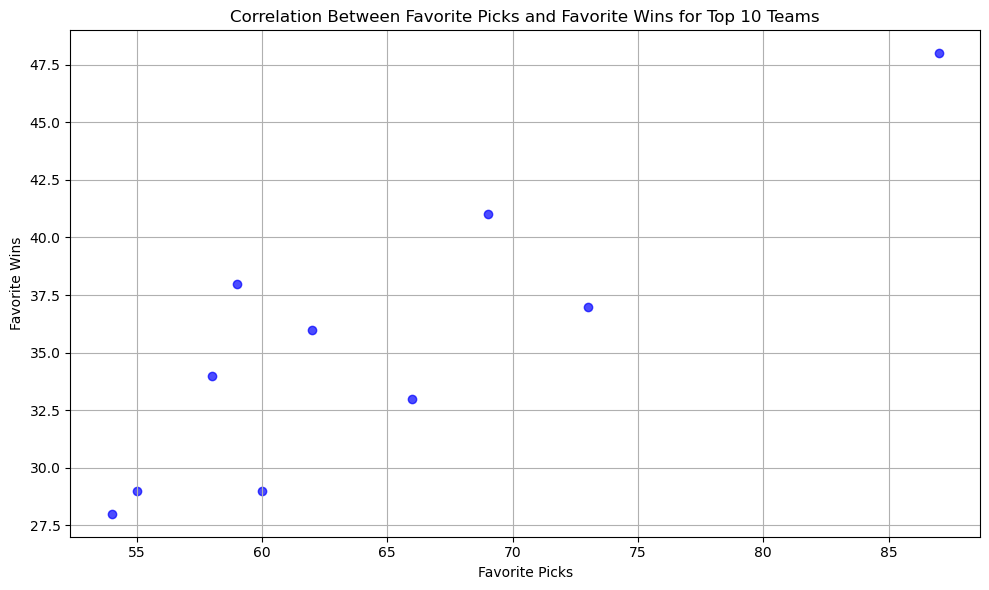

Pearson Correlation Coefficient: 0.8608717445841975
Pearson Correlation p-value: 0.0013811023190155494


In [63]:
#plot the output from the correlation calculation to a scatterplot for the top 10 teams
plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['Favorite Picks'].head(10), correlation_df['Favorite Wins'].head(10), color='blue', alpha=0.7)
plt.title('Correlation Between Favorite Picks and Favorite Wins for Top 10 Teams')
plt.xlabel('Favorite Picks')
plt.ylabel('Favorite Wins')
plt.grid(True)
plt.tight_layout()
plt.show()
pearson_corr, pearson_p_value = pearsonr(correlation_df['Favorite Picks'].head(10), correlation_df['Favorite Wins'].head(10))
#calculate Pearson's R to illustrate strength of correlation
print("Pearson Correlation Coefficient:", pearson_corr)
#calculate the p value to test whether Ho: there is no relationship between picked favorites and favorites who win
#is significant at a 95% confidence interval.  At p <.05 we may reject this null hypothesis
print("Pearson Correlation p-value:", pearson_p_value)

# Eddies Code
---

In [64]:
# Limit Dataframe to Playoff games
playoffs_df = cleaned_df.loc[cleaned_df['schedule_playoff'] == True]
playoffs_df = playoffs_df.reset_index(drop = True)
playoffs_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,HOU,BUF,HOU
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,NE,TEN,TEN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,NO,MIN,MIN
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,PHI,SEA,SEA
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,BAL,TEN,TEN


In [65]:
# Find rows where the favorite team won
pofav_df = playoffs_df[playoffs_df['team_favorite_id'] == playoffs_df['result']]
pofav_df = pofav_df.reset_index(drop = True)
pofav_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,HOU,BUF,HOU
1,1/11/2020,2019,Division,True,San Francisco 49ers,27,10,Minnesota Vikings,SF,SF,MIN,SF
2,1/12/2020,2019,Division,True,Green Bay Packers,28,23,Seattle Seahawks,GB,GB,SEA,GB
3,1/12/2020,2019,Division,True,Kansas City Chiefs,51,31,Houston Texans,KC,KC,HOU,KC
4,1/19/2020,2019,Conference,True,Kansas City Chiefs,35,24,Tennessee Titans,KC,KC,TEN,KC


In [66]:
# Group by result team
pofav_df = pofav_df.groupby('result')
pofav_df

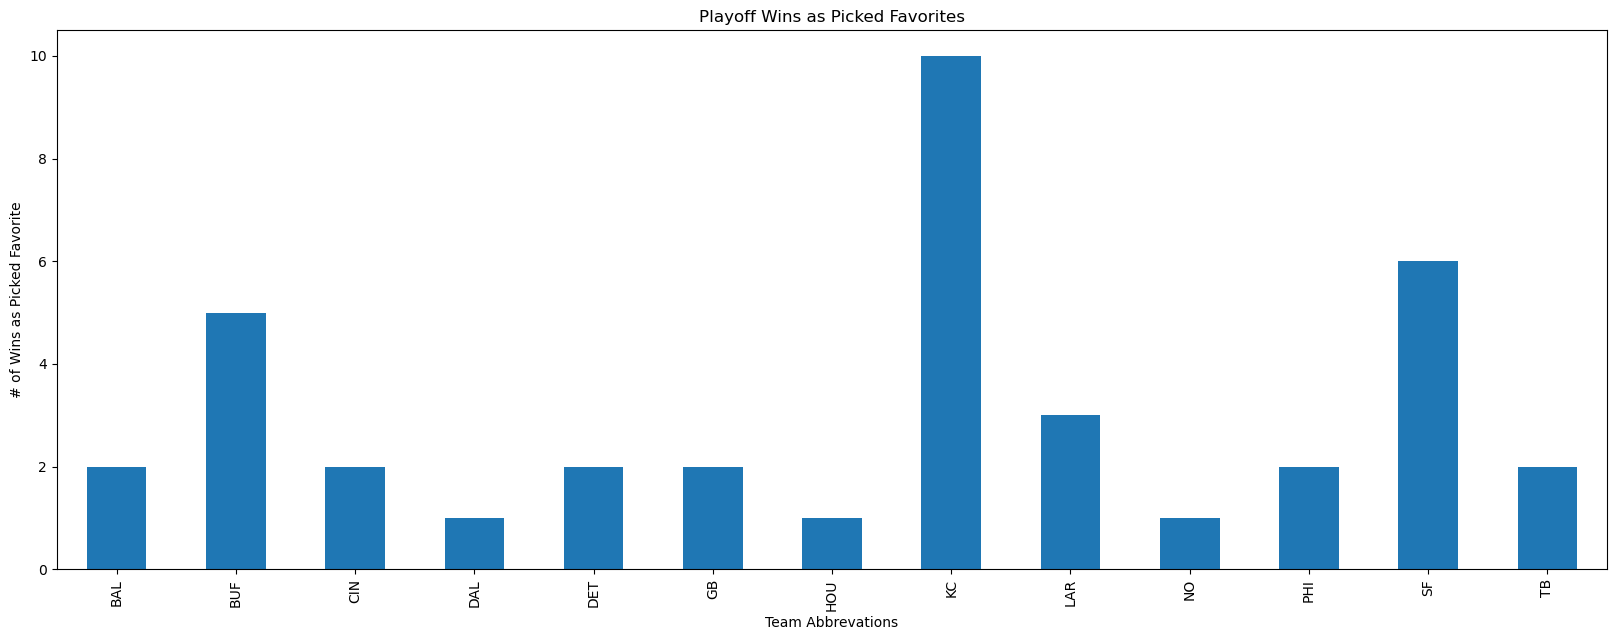

In [67]:
# Plot the counts for each team in a bar chart
pofav_df['result'].count().plot(kind = 'bar', figsize = (20,7))
plt.xlabel('Team Abbrevations')
plt.ylabel('# of Wins as Picked Favorite')
plt.title('Playoff Wins as Picked Favorites')
plt.show()

In [68]:
# Create dataframe where underdogs won instead of faves
poffunder_df = playoffs_df[playoffs_df['team_favorite_id'] != playoffs_df['result']]
poffunder_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,NE,TEN,TEN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,NO,MIN,MIN
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,PHI,SEA,SEA
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,BAL,TEN,TEN
12,1/9/2021,2020,Wildcard,True,Seattle Seahawks,20,30,Los Angeles Rams,SEA,SEA,LAR,LAR


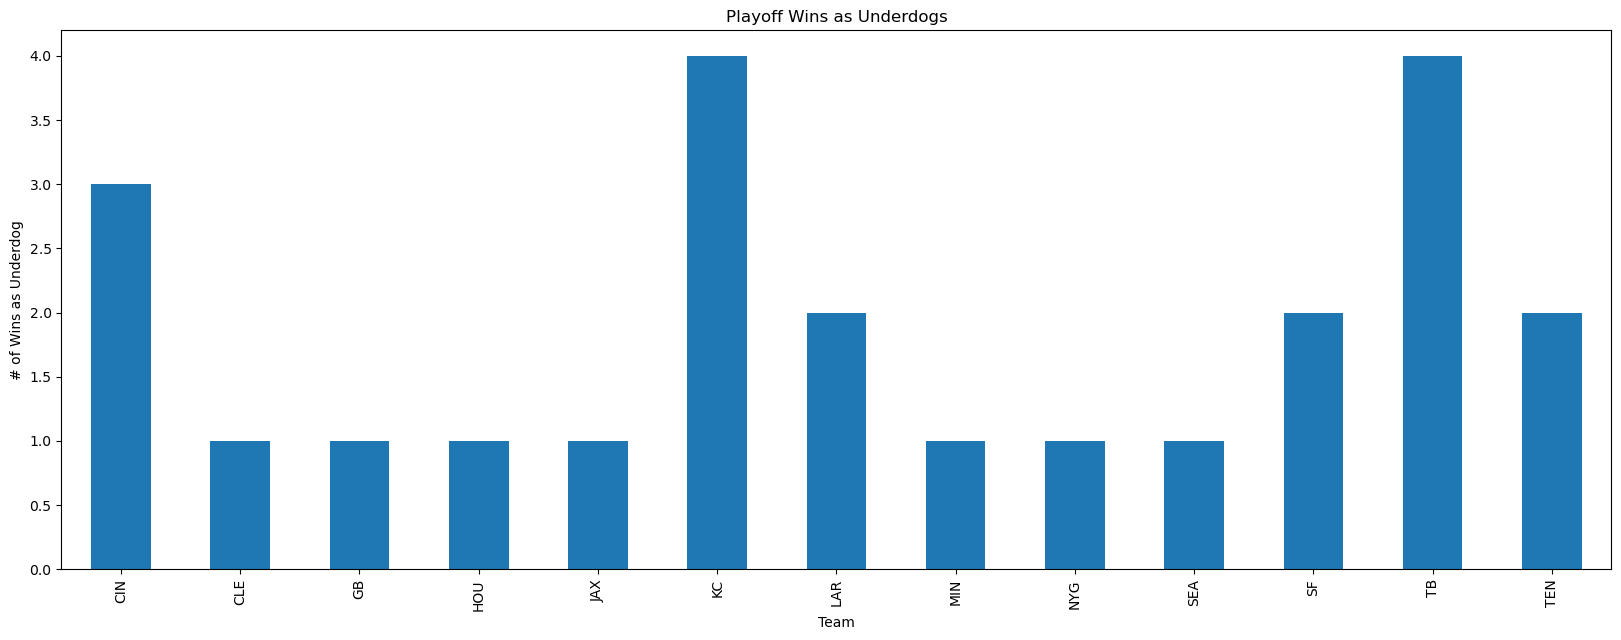

In [69]:
# Plot the counts for each team that won as an underdog
poffunder_df = poffunder_df.groupby('result')
poffunder_df['result'].count().plot(kind = 'bar', figsize = (20, 7))
plt.xlabel('Team')
plt.ylabel('# of Wins as Underdog')
plt.title('Playoff Wins as Underdogs')
plt.show()

In [70]:
#Create Outcomes Table
poffoutcome_df = pd.DataFrame(pofav_df['result'].count())
poffoutcome_df = poffoutcome_df.rename(columns = {'result' : 'favorite win count'})
poffoutcome_df['underdog win count'] = ''
poffoutcome_df['underdog win count'] = poffunder_df['result'].count()
poffoutcome_df['underdog win count'] = poffoutcome_df['underdog win count'].fillna(0)
poffoutcome_df

,favorite win count,underdog win count
result,,
BAL,2,0.0
BUF,5,0.0
CIN,2,3.0
DAL,1,0.0
DET,2,0.0
GB,2,1.0
HOU,1,1.0
KC,10,4.0
LAR,3,2.0


In [71]:
# Total Favorites and Underdog wins
totfavwins = poffoutcome_df['favorite win count'].sum()
totunderwins = poffoutcome_df['underdog win count'].sum()
totfavwinrate = totfavwins/(totfavwins + totunderwins) * 100
totfavwinrate

69.64285714285714

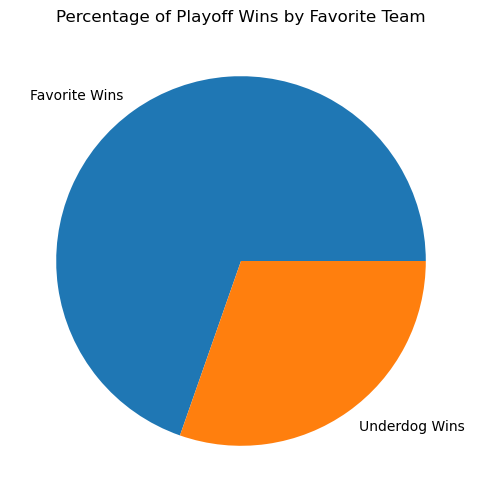

In [72]:
# plot pie chart of favorite wins and underdog wins
wins = np.array([totfavwins,totunderwins])
labels = ['Favorite Wins','Underdog Wins']

plt.figure(figsize = (10, 6))
plt.pie(wins, labels = labels)
plt.title('Percentage of Playoff Wins by Favorite Team')
plt.show()

In [73]:
# Find Play off counts & winrates
poffcount = playoffs_df['team_favorite_id'].value_counts()
poffwinrate = (poffoutcome_df['favorite win count']/poffcount) * 100
poffwinrate = poffwinrate.fillna(0)
poffwinrate = poffwinrate.sort_values(ascending = False)
poffwinrate
#poffcount

LAR    100.000000
CIN    100.000000
DET    100.000000
HOU    100.000000
SF      85.714286
KC      83.333333
BUF     71.428571
TB      66.666667
BAL     50.000000
GB      50.000000
PHI     40.000000
NO      33.333333
DAL     33.333333
LAC      0.000000
MIN      0.000000
NE       0.000000
PIT      0.000000
SEA      0.000000
CLE      0.000000
TEN      0.000000
dtype: float64

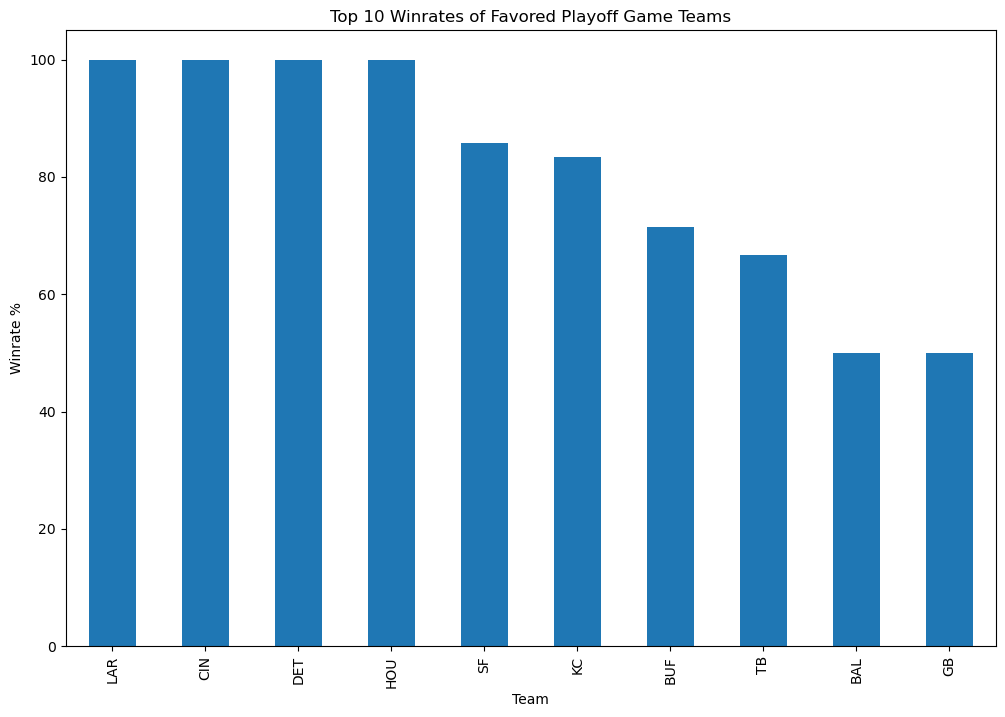

In [74]:
# Plot winrates
plt.figure(figsize = (12, 8))
poffwinrate.head(10).plot(kind = 'bar')
plt.title('Top 10 Winrates of Favored Playoff Game Teams')
plt.xlabel('Team')
plt.ylabel('Winrate %')
plt.show()

In [75]:
# Create favorite team picks dataframe
poffcount_df = pd.DataFrame({'Team':poffcount.index, 'Count': poffcount.values})
poffcount_df.columns = ['Team','Count']
poffcount_df['Team'] = poffcount_df['Team'].astype(str)
poffcount_df

,Team,Count
0,KC,12
1,SF,7
2,BUF,7
3,PHI,5
4,BAL,4
5,GB,4
6,TB,3
7,NO,3
8,LAR,3
9,DAL,3


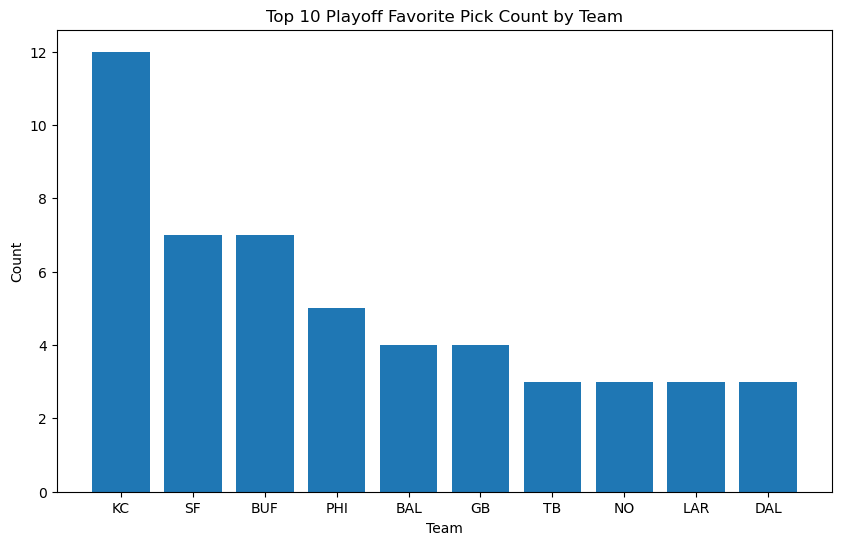

In [76]:
# Plot teams by playoff favorite pick counts
plt.figure(figsize = (10, 6))
plt.bar(poffcount_df['Team'].head(10), poffcount_df['Count'].head(10))
plt.title('Top 10 Playoff Favorite Pick Count by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [77]:
# Create win rate dataframe
poff_winrate_df = pd.DataFrame({'Team': poffwinrate.index, 'Winrate': poffwinrate.values})
poff_winrate_df.columns = ['Team','Winrate']
poff_winrate_df = poff_winrate_df.sort_values(by = 'Winrate', ascending = False)
poff_winrate_df

,Team,Winrate
0,LAR,100.000000
1,CIN,100.000000
2,DET,100.000000
3,HOU,100.000000
4,SF,85.714286
5,KC,83.333333
6,BUF,71.428571
7,TB,66.666667
8,BAL,50.000000
9,GB,50.000000


In [78]:
#Create favorite win df
poff_favwins_df = pd.DataFrame({'Team': poffoutcome_df.index, 'Wins': poffoutcome_df['favorite win count']})
poff_favwins_df = poff_favwins_df.reset_index(drop = True)
poff_favwins_df['Team'] = poff_favwins_df['Team'].astype(str)
poff_favwins_df

,Team,Wins
0,BAL,2
1,BUF,5
2,CIN,2
3,DAL,1
4,DET,2
5,GB,2
6,HOU,1
7,KC,10
8,LAR,3
9,NO,1


In [79]:
# Merge dataframes
poff_correlation_df = pd.merge(poffcount_df, poff_favwins_df, on = 'Team', how = 'left')
poff_correlation_df.columns = ['Team','Picks','Wins']
poff_correlation_df['Wins'] = poff_correlation_df['Wins'].fillna(0)
poff_correlation_df['Winrate'] = (poff_correlation_df['Wins'] / poff_correlation_df['Picks']) * 100
poff_correlation_df = poff_correlation_df.sort_values(by = 'Picks', ascending = False)
poff_correlation_df

,Team,Picks,Wins,Winrate
0,KC,12,10.0,83.333333
2,BUF,7,5.0,71.428571
1,SF,7,6.0,85.714286
3,PHI,5,2.0,40.000000
4,BAL,4,2.0,50.000000
5,GB,4,2.0,50.000000
6,TB,3,2.0,66.666667
7,NO,3,1.0,33.333333
8,LAR,3,3.0,100.000000
9,DAL,3,1.0,33.333333


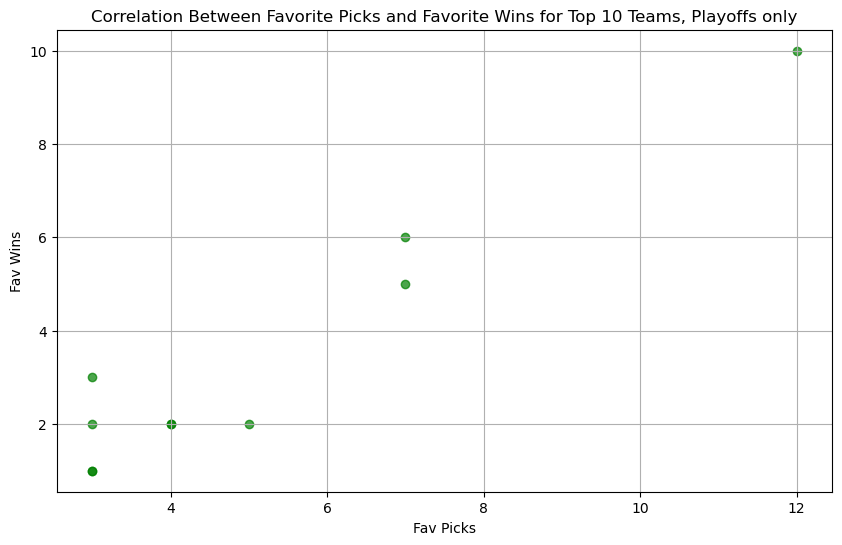

In [80]:
# Correlation Plot
plt.figure(figsize = (10,6))
plt.scatter(poff_correlation_df['Picks'].head(10), poff_correlation_df['Wins'].head(10), color = 'green', alpha = 0.7)
plt.title('Correlation Between Favorite Picks and Favorite Wins for Top 10 Teams, Playoffs only')
plt.xlabel('Fav Picks')
plt.ylabel('Fav Wins')
plt.grid(True)
plt.show()

In [81]:
# Find correlation coefficient
from scipy.stats import pearsonr
pearson_corr = pearsonr(poff_correlation_df['Picks'].head(10),poff_correlation_df['Wins'].head(10))
pearson_corr

PearsonRResult(statistic=0.9587260083891305, pvalue=1.207840642465253e-05)